单元测试：验证 `plcoding.research.monotone` 模块是否工作正常，它支持关于单调链极化码（Monotone Chain Polar Codes）的各种深入研究

In [1]:
import plcoding
from plcoding.research import monotone
import numpy as np
from tqdm import trange

In [2]:
# 生成一个联合概率分布
jProb = monotone.JointProb(probs=[0.1286, 0.0175, 0.0175, 0.8364], bases=[2, 2])
# 初始化一个极化变换上的迭代器对象
pIter = monotone.MCIterator(block_len=(1 << 10), jProb=jProb)
pIter.set_priors(jProb.gen_iids(pIter.N))
# 生成一条单调链
superscripts = np.tile(np.arange(jProb.M), (pIter.N, 1)).T.ravel()
#np.random.shuffle(superscripts)
chain = monotone.MNChain(sups=superscripts, M=jProb.M, N=pIter.N)

In [3]:
# 跑多轮译码，查看条件概率分布的熵（近似条件熵）的极化图案
nsim = 10
entropies = np.zeros(shape=[jProb.M, pIter.N], dtype=float)
for s in trange(nsim, ncols=80):
    pIter.reset()
    for t in range(len(chain)):
        var, index = chain.sups[t], chain.subs[t]
        condt_prob = pIter.get_prob(var=var, index=index)
        value = np.random.choice(a=len(condt_prob), p=condt_prob)
        entropies[var, index] += plcoding.entropy_of(condt_prob) / nsim
        pIter.set_value(var=var, index=index, value=value)

100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  9.87it/s]


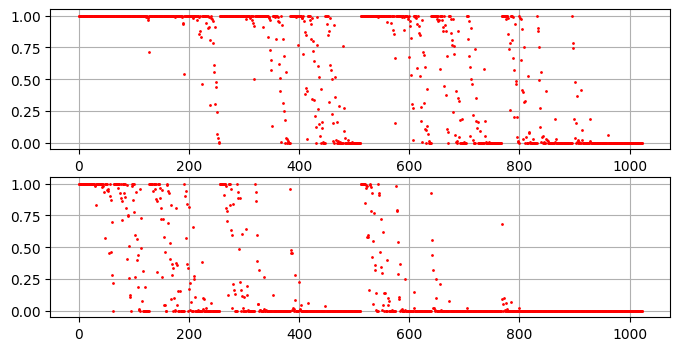

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
# 绘制各变量的极化熵
for var in range(jProb.M):
    plt.subplot(jProb.M, 1, var + 1)
    plt.plot(entropies[var, :], "r.", ms=2)
    plt.grid()
plt.show()